In [131]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from models.elm import ELMClassifier, ELMRegressor
from models.perceptron import PerceptronClassifier
from models.rbf import RBFClassifier, RBFRegressor
from models.elm_hebbian import ELMHebbianClassifier, ELMHebbianRegressor
from models.adaline import Adaline
from experiments.evaluation import k_fold_cross_validation, plot_scores_per_dataset
from sklearn.datasets import load_digits, load_breast_cancer, load_wine, load_boston, load_diabetes, load_iris, make_blobs, make_moons, make_circles

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
# blobs
X, y = make_blobs(n_features=2, centers=[[1,1], [-1,-1]], random_state=1234)
#X, y = make_moons(100, random_state=1234, noise=0.1)
#X, y = make_circles(100, random_state=1234, noise=0.1)
y = pd.Series(y).map({0:-1,1:1}).to_numpy()

# train
elm = ELMClassifier(p=15).fit(X, y)
elm_heb = ELMHebbianClassifier(p=15).fit(X, y)
elm_reg = ELMClassifier(p=15, reg_factor=0.0001).fit(X, y)
rbf = RBFClassifier(p=15).fit(X, y)
rbf_reg = RBFClassifier(p=15, reg_factor=1000000).fit(X, y)

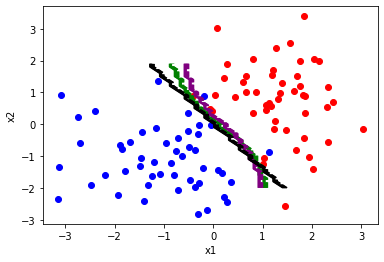

In [158]:
# and plot
fig, ax = plt.subplots()

t_class0 = y == -1
t_class1 = y == 1
ax.scatter(X[t_class0, 0], X[t_class0, 1], color='red')
ax.scatter(X[t_class1, 0], X[t_class1, 1], color='blue')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

def add_decision_surface(ax, color, model):
    x1 = np.arange(-2, 2, step=0.1)
    x2 = np.arange(-2, 2, step=0.1)

    xx, yy = np.meshgrid(x1, x2)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    y_hat = model.predict(grid)

    zz_model = y_hat.reshape(xx.shape)  
    ax.contour(xx, yy, zz_model, colors=[color])


add_decision_surface(ax, 'green', elm)
add_decision_surface(ax, 'purple', elm_reg)
add_decision_surface(ax, 'black', elm_heb)
#add_decision_surface(ax, 'orange', heb)

#add_decision_surface(ax, 'gray', rbf)
#add_decision_surface(ax, 'cyan', rbf_reg)

fig.show()